In [409]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [410]:
hotel_data = pd.read_csv('../dataset/hotel_bookings.csv') 
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [411]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [412]:
hotel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


# Now will detect missing values 

In [413]:
show_missing_values = hotel_data.isnull().sum().sort_values(ascending=False) 
missing_values = show_missing_values[show_missing_values > 0] 
missing_values_percent = (missing_values / len(hotel_data)) * 100
missing_values_percent




company     94.306893
agent       13.686238
country      0.408744
children     0.003350
dtype: float64

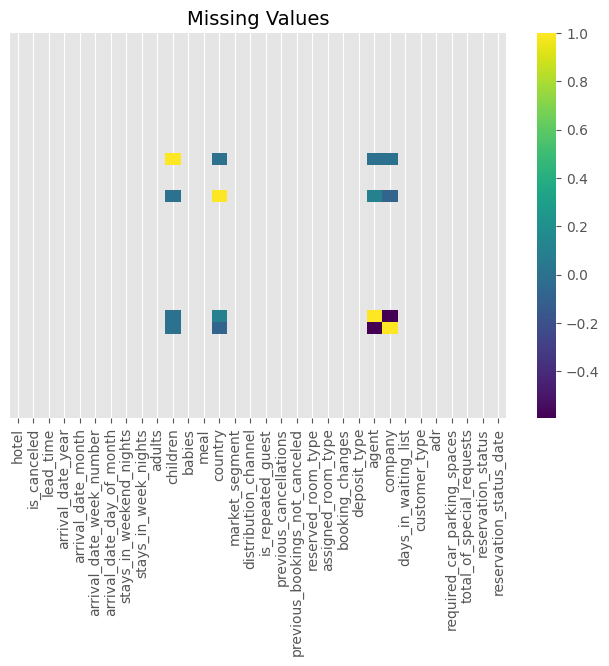

In [414]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5)) 
plot = sns.heatmap(hotel_data.isnull().corr(numeric_only=True) ,   yticklabels=False, cbar=True, cmap='viridis') 
plot.set_title('Missing Values' , fontdict={'size' :14}) 
# plt.title('Missing Vlaues' , fontsize = 28)
plt.show()

In [415]:
hotel_data.select_dtypes('object').head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


# Now will Detect Outliears

In [416]:
# get numric colunms 

num_col = hotel_data.select_dtypes(include='number').columns
num_col

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [417]:
# 2 calculate IQR and identify outliers 

for col in hotel_data[num_col]:
    Q1 = hotel_data[col].quantile(0.25) 
    Q3 = hotel_data[col].quantile(0.75) 
    IQR  = Q3 - Q1 
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR 
    outliers = hotel_data[(hotel_data[col] < lower) | (hotel_data[col] > upper)]
    if len(outliers) > 0 : 
        print(f"Column: {col}, Number of outliers: {len(outliers)}")


Column: lead_time, Number of outliers: 3005
Column: stays_in_weekend_nights, Number of outliers: 265
Column: stays_in_week_nights, Number of outliers: 3354
Column: adults, Number of outliers: 29710
Column: children, Number of outliers: 8590
Column: babies, Number of outliers: 917
Column: is_repeated_guest, Number of outliers: 3810
Column: previous_cancellations, Number of outliers: 6484
Column: previous_bookings_not_canceled, Number of outliers: 3620
Column: booking_changes, Number of outliers: 18076
Column: days_in_waiting_list, Number of outliers: 3698
Column: adr, Number of outliers: 3793
Column: required_car_parking_spaces, Number of outliers: 7416
Column: total_of_special_requests, Number of outliers: 2877


C:\Users\mahmod\AppData\Local\Temp\ipykernel_2352\430701212.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


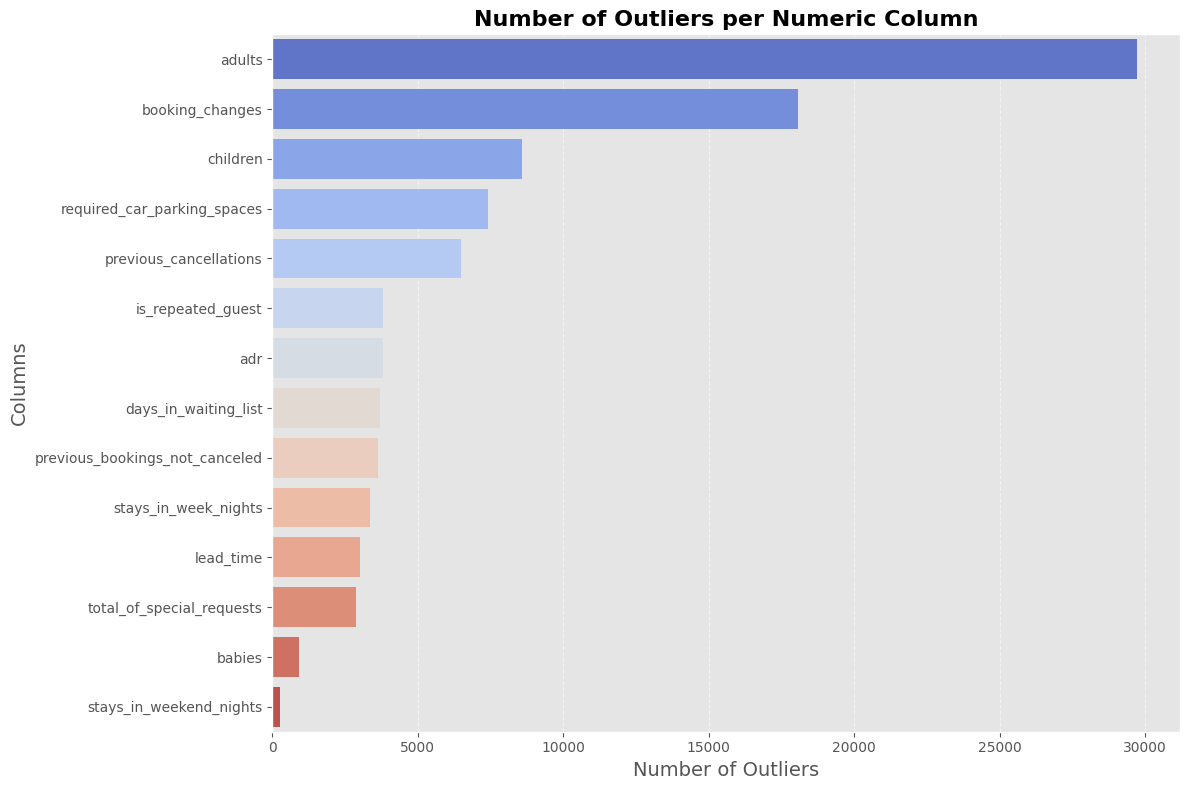

In [418]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


outliers_data = {
    'column': [
        'lead_time','stays_in_weekend_nights','stays_in_week_nights','adults',
        'children','babies','is_repeated_guest','previous_cancellations',
        'previous_bookings_not_canceled','booking_changes','days_in_waiting_list',
        'adr','required_car_parking_spaces','total_of_special_requests'
    ],
    'num_outliers': [
        3005,265,3354,29710,8590,917,3810,6484,3620,18076,3698,3793,7416,2877
    ]
}

df_outliers = pd.DataFrame(outliers_data)
df_outliers = df_outliers.sort_values(by='num_outliers', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_outliers,
    y='column',
    x='num_outliers',
    palette='coolwarm'
)

plt.title('Number of Outliers per Numeric Column', fontsize=16, fontweight='bold')
plt.xlabel('Number of Outliers', fontsize=14)
plt.ylabel('Columns', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# phase 2 Data cleaning 

In [419]:
# handel missing values 

hotel_data.drop(columns=['company'] ,axis=1 ,inplace=True)

In [420]:
print('yes') if 'company' in hotel_data.columns else print('no') 


no


In [421]:
show_missing_values = hotel_data.isnull().sum().sort_values(ascending=False) 
missing_values = show_missing_values[show_missing_values > 0] 
missing_values_percent = (missing_values / len(hotel_data)) * 100
missing_values_percent


agent       13.686238
country      0.408744
children     0.003350
dtype: float64

In [422]:
hotel_data['children'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: children
Non-Null Count   Dtype  
--------------   -----  
119386 non-null  float64
dtypes: float64(1)
memory usage: 932.9 KB


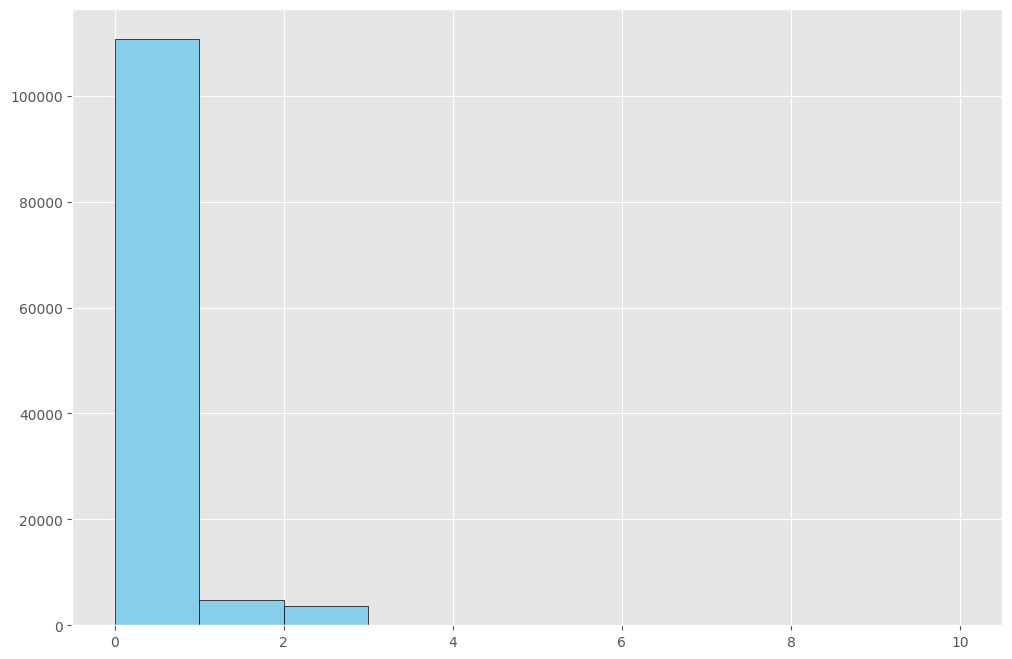

In [423]:
plt.figure(figsize=(12, 8))
plt.hist(hotel_data['children'] , bins=10 , color='skyblue', edgecolor='black')
plt.show()

In [424]:
hotel_data['children'] = hotel_data['children'].fillna(hotel_data['children'].median())

In [425]:
hotel_data['country'] = hotel_data['country'].fillna(hotel_data['country'].mode()[0]) 


In [426]:
show_missing_values = hotel_data.isnull().sum().sort_values(ascending=False) 
missing_values = show_missing_values[show_missing_values > 0] 
missing_values_percent = (missing_values / len(hotel_data)) * 100
missing_values_percent

agent    13.686238
dtype: float64

In [427]:
hotel_data['agent'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: agent
Non-Null Count   Dtype  
--------------   -----  
103050 non-null  float64
dtypes: float64(1)
memory usage: 932.9 KB


In [428]:
hotel_data['agent'].describe().T

count    103050.000000
mean         86.693382
std         110.774548
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64

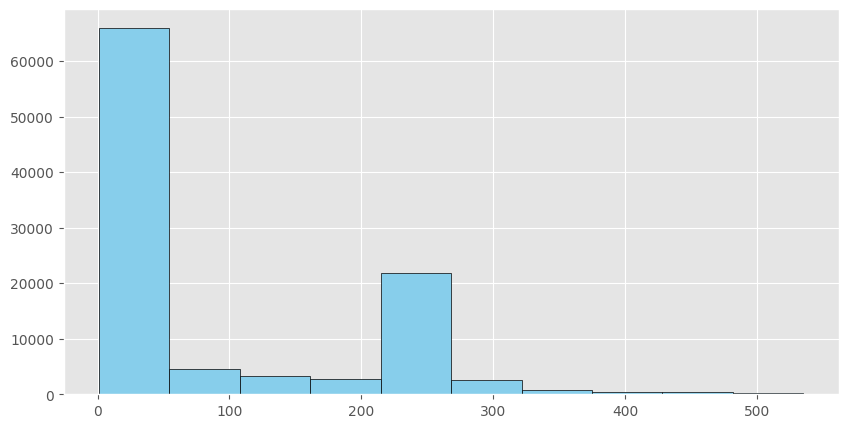

In [429]:
plt.figure(figsize=(10,5)) 
plt.hist(hotel_data['agent'] , bins=10 , color='skyblue', edgecolor='black')
plt.show()

In [430]:
hotel_data['agent'].tail()

119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, dtype: float64

In [431]:
hotel_data['agent'] = hotel_data['agent'].fillna(hotel_data['agent'].median())

In [432]:
show_missing_values = hotel_data.isnull().sum().sort_values(ascending=False) 
missing_values = show_missing_values[show_missing_values > 0] 
missing_values_percent = (missing_values / len(hotel_data)) * 100
missing_values_percent

Series([], dtype: float64)

In [433]:
# check dublicates 

# dublicates = dict({})

# for col in hotel_data.columns:
#     dublicates[col] = hotel_data.duplicated(subset=[col]).sum() 

print(hotel_data.duplicated().sum())


32020


In [434]:
hotel_data[hotel_data.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,0,No Deposit,240.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,0,No Deposit,240.0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,0,No Deposit,9.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [435]:
hotel_data = hotel_data.drop_duplicates()

In [436]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87370 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87370 non-null  object 
 1   is_canceled                     87370 non-null  int64  
 2   lead_time                       87370 non-null  int64  
 3   arrival_date_year               87370 non-null  int64  
 4   arrival_date_month              87370 non-null  object 
 5   arrival_date_week_number        87370 non-null  int64  
 6   arrival_date_day_of_month       87370 non-null  int64  
 7   stays_in_weekend_nights         87370 non-null  int64  
 8   stays_in_week_nights            87370 non-null  int64  
 9   adults                          87370 non-null  int64  
 10  children                        87370 non-null  float64
 11  babies                          87370 non-null  int64  
 12  meal                            8737

In [437]:
num_col = hotel_data.select_dtypes(include=['int64','float64']).columns

for col in hotel_data[num_col]:
    Q1 = hotel_data[col].quantile(0.25) 
    Q3 = hotel_data[col].quantile(0.75) 
    IQR  = Q3 - Q1 
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR 
    outliers = hotel_data[(hotel_data[col] < lower) | (hotel_data[col] > upper)]
    if len(outliers) > 0 : 
        print(f"Column: {col}, Number of outliers: {len(outliers)}")

Column: lead_time, Number of outliers: 2396
Column: stays_in_weekend_nights, Number of outliers: 220
Column: stays_in_week_nights, Number of outliers: 1531
Column: adults, Number of outliers: 22882
Column: children, Number of outliers: 8364
Column: babies, Number of outliers: 914
Column: is_repeated_guest, Number of outliers: 3415
Column: previous_cancellations, Number of outliers: 1685
Column: previous_bookings_not_canceled, Number of outliers: 3545
Column: booking_changes, Number of outliers: 15901
Column: days_in_waiting_list, Number of outliers: 860
Column: adr, Number of outliers: 2488
Column: required_car_parking_spaces, Number of outliers: 7313
Column: total_of_special_requests, Number of outliers: 2672


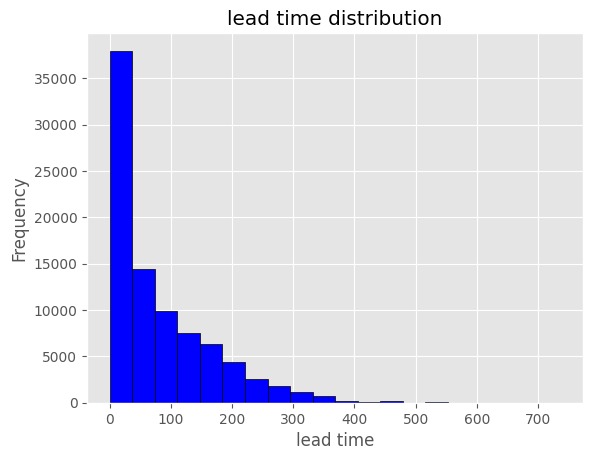

In [438]:
fig , ax = plt.subplots() 

ax.hist(hotel_data['lead_time'] ,bins=20 , edgecolor='black' ,color= 'blue' ) 
ax.set_title('lead time distribution')
ax.set_xlabel('lead time')
ax.set_ylabel('Frequency')
plt.show()

In [439]:
upper = hotel_data['lead_time'].quantile(0.75)
lower = hotel_data['lead_time'].quantile(0.25)
IQR = upper - lower

upper_limit = upper + 1.5 * IQR
lower_limit = lower - 1.5 * IQR
hotel_data = hotel_data[(hotel_data['lead_time'] >= lower_limit) & (hotel_data['lead_time'] <= upper_limit)]

In [440]:
hotel_data['lead_time'] = np.where(hotel_data['lead_time'] > 365, 365, hotel_data['lead_time'])


In [441]:
hotel_data['stays_in_weekend_nights'] = np.where(hotel_data['stays_in_weekend_nights'] > 14, 14, hotel_data['stays_in_weekend_nights'])
hotel_data['stays_in_week_nights'] = np.where(hotel_data['stays_in_week_nights'] > 21, 21, hotel_data['stays_in_week_nights'])


In [442]:
hotel_data['adults'] = np.where(hotel_data['adults'] > 10, 10, hotel_data['adults'])
hotel_data['children'] = np.where(hotel_data['children'] > 5, 5, hotel_data['children'])
hotel_data['babies'] = np.where(hotel_data['babies'] > 3, 3, hotel_data['babies'])


In [443]:
hotel_data['previous_cancellations'] = np.where(hotel_data['previous_cancellations'] > 10, 10, hotel_data['previous_cancellations'])
hotel_data['previous_bookings_not_canceled'] = np.where(hotel_data['previous_bookings_not_canceled'] > 10, 10, hotel_data['previous_bookings_not_canceled'])


In [444]:
num_col = hotel_data.select_dtypes(include=['int64','float64']).columns

for col in hotel_data[num_col]:
    Q1 = hotel_data[col].quantile(0.25) 
    Q3 = hotel_data[col].quantile(0.75) 
    IQR  = Q3 - Q1 
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR 
    outliers = hotel_data[(hotel_data[col] < lower) | (hotel_data[col] > upper)]
    if len(outliers) > 0 : 
        print(f"Column: {col}, Number of outliers: {len(outliers)}")

Column: lead_time, Number of outliers: 877
Column: stays_in_weekend_nights, Number of outliers: 212
Column: stays_in_week_nights, Number of outliers: 2845
Column: adults, Number of outliers: 22360
Column: children, Number of outliers: 8155
Column: babies, Number of outliers: 892
Column: is_repeated_guest, Number of outliers: 3394
Column: previous_cancellations, Number of outliers: 1567
Column: previous_bookings_not_canceled, Number of outliers: 3516
Column: booking_changes, Number of outliers: 15188
Column: days_in_waiting_list, Number of outliers: 744
Column: adr, Number of outliers: 2348
Column: required_car_parking_spaces, Number of outliers: 7217
Column: total_of_special_requests, Number of outliers: 2580


In [445]:
hotel_data['booking_changes'] = np.where(hotel_data['booking_changes'] > 5, 5, hotel_data['booking_changes'])


In [446]:
hotel_data['days_in_waiting_list'] = np.where(hotel_data['days_in_waiting_list'] > 180, 180, hotel_data['days_in_waiting_list'])


In [447]:
hotel_data['adr'] = np.where(hotel_data['adr'] > 1000, 1000, hotel_data['adr'])


In [448]:
hotel_data['required_car_parking_spaces'] = np.where(hotel_data['required_car_parking_spaces'] > 3, 3, hotel_data['required_car_parking_spaces'])


In [449]:
hotel_data['required_car_parking_spaces'] = np.where(hotel_data['required_car_parking_spaces'] > 3, 3, hotel_data['required_car_parking_spaces'])


In [450]:
num_col = hotel_data.select_dtypes(include=['int64','float64']).columns

for col in hotel_data[num_col]:
    Q1 = hotel_data[col].quantile(0.25) 
    Q3 = hotel_data[col].quantile(0.75) 
    IQR  = Q3 - Q1 
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR 
    outliers = hotel_data[(hotel_data[col] < lower) | (hotel_data[col] > upper)]
    if len(outliers) > 0 : 
        print(f"Column: {col}, Number of outliers: {len(outliers)}")

Column: lead_time, Number of outliers: 877
Column: stays_in_weekend_nights, Number of outliers: 212
Column: stays_in_week_nights, Number of outliers: 2845
Column: adults, Number of outliers: 22360
Column: children, Number of outliers: 8155
Column: babies, Number of outliers: 892
Column: is_repeated_guest, Number of outliers: 3394
Column: previous_cancellations, Number of outliers: 1567
Column: previous_bookings_not_canceled, Number of outliers: 3516
Column: booking_changes, Number of outliers: 15188
Column: days_in_waiting_list, Number of outliers: 744
Column: adr, Number of outliers: 2348
Column: required_car_parking_spaces, Number of outliers: 7217
Column: total_of_special_requests, Number of outliers: 2580


# now fix data types of columns 


In [451]:
# print info 

hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84974 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           84974 non-null  object 
 1   is_canceled                     84974 non-null  int64  
 2   lead_time                       84974 non-null  int64  
 3   arrival_date_year               84974 non-null  int64  
 4   arrival_date_month              84974 non-null  object 
 5   arrival_date_week_number        84974 non-null  int64  
 6   arrival_date_day_of_month       84974 non-null  int64  
 7   stays_in_weekend_nights         84974 non-null  int64  
 8   stays_in_week_nights            84974 non-null  int64  
 9   adults                          84974 non-null  int64  
 10  children                        84974 non-null  float64
 11  babies                          84974 non-null  int64  
 12  meal                            8497

In [452]:
# 1 convert is_cancel column to boolean column  


hotel_data['is_canceled'] = hotel_data['is_canceled'].astype(bool) 

hotel_data['arrival_date'] = pd.to_datetime(
    hotel_data['arrival_date_day_of_month'].astype(str) + ' ' +
    hotel_data['arrival_date_month'].astype(str) + ' ' +
    hotel_data['arrival_date_year'].astype(str),
    format='%d %B %Y'
)
#2 convert  arrival_date_year to datetime 

hotel_data['arrival_date_year'] = pd.to_datetime(hotel_data['arrival_date_year'], format='%Y')

#3 convert arrival_date_month to datetime

hotel_data['arrival_date_month'] = pd.to_datetime(hotel_data['arrival_date_month'], format='%B')

#4 convert arrival_date_day_of_month to datetime

hotel_data['arrival_date_day_of_month'] = pd.to_datetime(hotel_data['arrival_date_day_of_month'], format='%d')


#make new column called arival_date and combine arrival_date_year, arrival_date_month, arrival_date_day_of_month





C:\Users\mahmod\AppData\Local\Temp\ipykernel_2352\3994054480.py:22: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  hotel_data['arrival_date_day_of_month'] = pd.to_datetime(hotel_data['arrival_date_day_of_month'], format='%d')


In [453]:
hotel_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 84974 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           84974 non-null  object        
 1   is_canceled                     84974 non-null  bool          
 2   lead_time                       84974 non-null  int64         
 3   arrival_date_year               84974 non-null  datetime64[ns]
 4   arrival_date_month              84974 non-null  datetime64[ns]
 5   arrival_date_week_number        84974 non-null  int64         
 6   arrival_date_day_of_month       84974 non-null  datetime64[ns]
 7   stays_in_weekend_nights         84974 non-null  int64         
 8   stays_in_week_nights            84974 non-null  int64         
 9   adults                          84974 non-null  int64         
 10  children                        84974 non-null  float64       
 11  babies

In [454]:
hotel_data.select_dtypes(include='object').columns

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [455]:
hotel_data['reservation_status_date'].head()

2    2015-07-02
3    2015-07-02
4    2015-07-03
6    2015-07-03
7    2015-07-03
Name: reservation_status_date, dtype: object

In [456]:
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'] , format='%Y-%m-%d')

# Now will make feature enineering phase

In [457]:
hotel_data['total_guests'] = hotel_data['adults'] + hotel_data['children'] + hotel_data['babies'] 
hotel_data['minor_guests'] = hotel_data['children'] + hotel_data['babies']
hotel_data['total_nights'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights'] 
hotel_data['is_family'] = hotel_data['minor_guests'].apply(lambda x: True if x > 0 else False)
hotel_data[['total_guests' , 'minor_guests' , 'total_nights' , 'is_family']]

,total_guests,minor_guests,total_nights,is_family
2,1.0,0.0,1,False
3,1.0,0.0,1,False
4,2.0,0.0,2,False
6,2.0,0.0,2,False
7,2.0,0.0,2,False
...,...,...,...,...
119385,2.0,0.0,7,False
119386,3.0,0.0,7,False
119387,2.0,0.0,7,False
119388,2.0,0.0,7,False


# now  will encode features 

In [458]:
number_of_unique_values = hotel_data.select_dtypes(include='object').nunique()
number_of_unique_values

hotel                     2
meal                      5
country                 176
market_segment            8
distribution_channel      5
reserved_room_type       10
assigned_room_type       12
deposit_type              3
customer_type             4
reservation_status        3
dtype: int64

In [460]:
# first hotel feature 
hotel_data = pd.get_dummies(hotel_data , columns=['hotel' , 'meal' ,'market_segment' , 'distribution_channel' , 'reserved_room_type' , 'assigned_room_type' , 'deposit_type' , 'customer_type' , 'reservation_status'] , drop_first=True)

In [461]:
hotel_data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
2,False,7,2015-01-01,1900-07-01,27,1900-01-01,0,1,1,0.0,...,False,False,False,False,False,False,True,False,True,False
3,False,13,2015-01-01,1900-07-01,27,1900-01-01,0,1,1,0.0,...,False,False,False,False,False,False,True,False,True,False
4,False,14,2015-01-01,1900-07-01,27,1900-01-01,0,2,2,0.0,...,False,False,False,False,False,False,True,False,True,False
6,False,0,2015-01-01,1900-07-01,27,1900-01-01,0,2,2,0.0,...,False,False,False,False,False,False,True,False,True,False
7,False,9,2015-01-01,1900-07-01,27,1900-01-01,0,2,2,0.0,...,False,False,False,False,False,False,True,False,True,False


In [462]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84974 entries, 2 to 119389
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   is_canceled                     84974 non-null  bool          
 1   lead_time                       84974 non-null  int64         
 2   arrival_date_year               84974 non-null  datetime64[ns]
 3   arrival_date_month              84974 non-null  datetime64[ns]
 4   arrival_date_week_number        84974 non-null  int64         
 5   arrival_date_day_of_month       84974 non-null  datetime64[ns]
 6   stays_in_weekend_nights         84974 non-null  int64         
 7   stays_in_week_nights            84974 non-null  int64         
 8   adults                          84974 non-null  int64         
 9   children                        84974 non-null  float64       
 10  babies                          84974 non-null  int64         
 11  countr

In [463]:
frq_encode = hotel_data['country'].value_counts() 
hotel_data['country_frq'] = hotel_data['country'].map(frq_encode)
hotel_data[['country' , 'country_frq']]

,country,country_frq
2,GBR,9757
3,GBR,9757
4,GBR,9757
6,PRT,27096
7,PRT,27096
...,...,...
119385,BEL,2040
119386,FRA,8743
119387,DEU,5192
119388,GBR,9757


In [464]:
cols_to_drop = ['reservation_status', 'reservation_status_date']

print("Columns before dropping leakage:", hotel_data.columns.tolist())
df_clean = hotel_data.drop(columns=cols_to_drop, errors='ignore').copy()
df_clean.info()

Columns before dropping leakage: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'country', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date', 'arrival_date', 'total_guests', 'minor_guests', 'total_nights', 'is_family', 'hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'market_segment_Undefined', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_TA/TO', 'distribution_channel_Undefined', 'reserved_room_type_B', 'reserved_room_type_C'